# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Ali Majlesi
2.   Student Number: 401201108


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
# from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
plays

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [4]:
artists

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte
...,...,...
17627,18741,Diamanda Galás
17628,18742,Aya RL
17629,18743,Coptic Rain
17630,18744,Oz Alchemist


In [5]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = pd.merge(left=artists, right=plays, left_on="id",right_on="artistID")# Your Code

In [6]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [7]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [8]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

#TODO
ap = ap.drop(columns=['id'])

In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################

artist_rank = ap.groupby(['name']).agg({'userID':'count','playCount':'sum'}).rename(columns={"userID": "totalUniqueUsers","playCount":"totalArtistPlays"}).sort_values(by ='totalArtistPlays',ascending=False)

artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays']/artist_rank['totalUniqueUsers']


In [10]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [11]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################



ap = pd.merge(left=ap, right=artist_rank, on="name").sort_values(by ='playCount',ascending=False) #TODO

In [12]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,Thalía,2071,792,324663,26,350035,13462.884615
27302,U2,1094,511,320725,185,493024,2664.994595
8152,Blur,1905,203,257978,114,318221,2791.412281
26670,Paramore,1664,498,227829,399,963449,2414.659148
21191,Evanescence,1146,378,203165,226,513476,2272.017699
14165,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,Shakira,1983,701,172496,319,688529,2158.398119
33127,Shakira,757,701,169596,319,688529,2158.398119
31835,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [13]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

C:\Users\majle\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


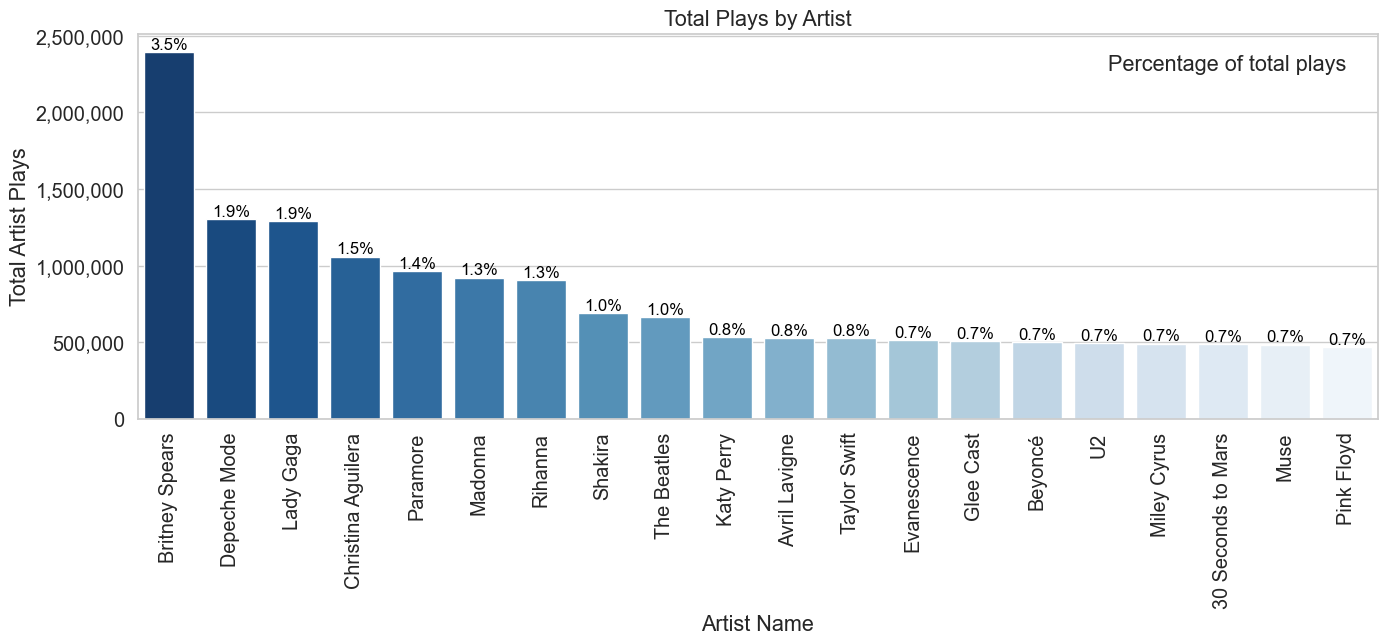

In [14]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

C:\Users\majle\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


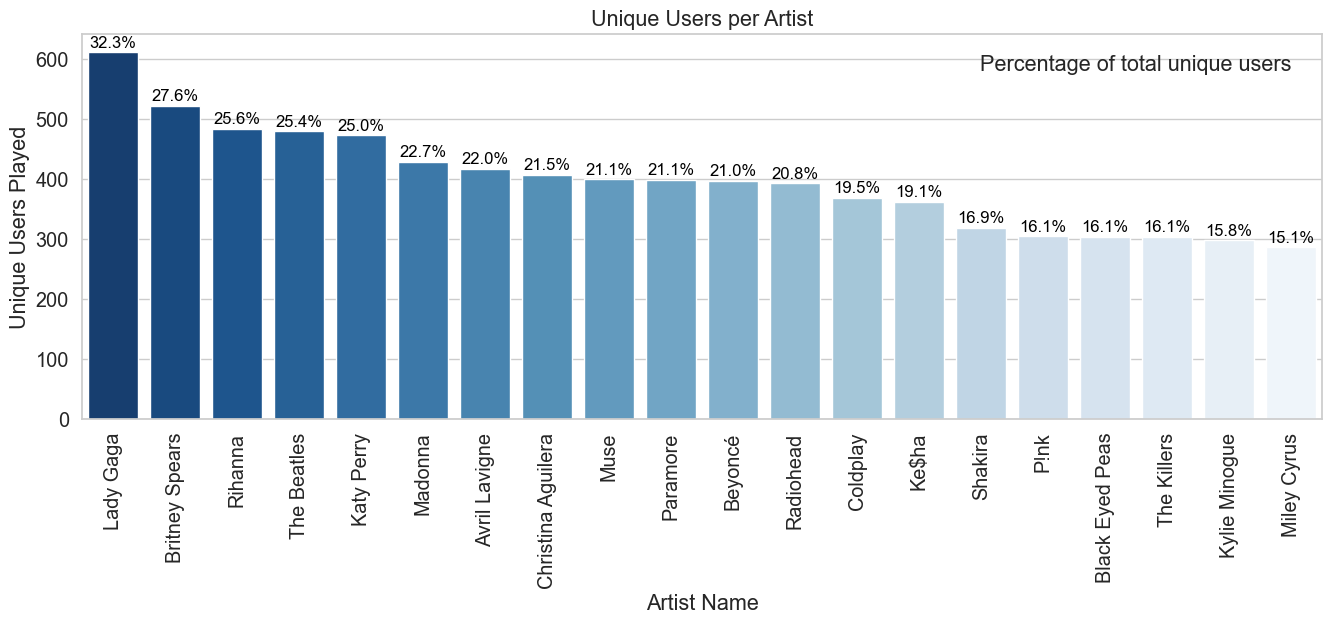

In [15]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

C:\Users\majle\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


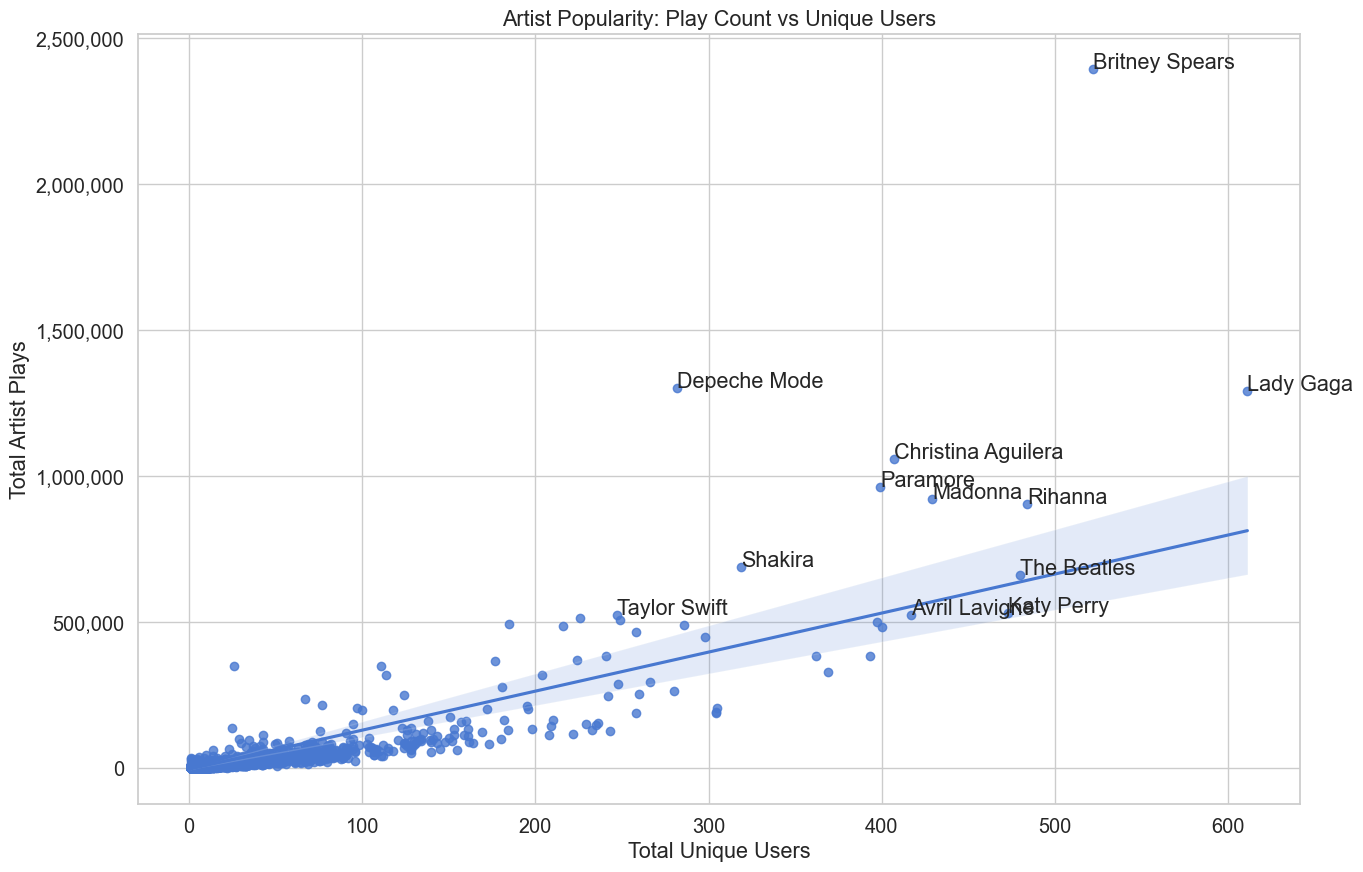

In [16]:
top_artists =  artist_rank.nlargest(12,"totalArtistPlays").index # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank.totalUniqueUsers # TODO : "totalUniqueUsers" of "artist_rank"
y =  artist_rank.totalArtistPlays # TODO :  "totalArtistPlays" of "artist_rank"
labels =  artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [17]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [18]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = pd.pivot_table(ap,values='playCountScaled',index='userID',columns='artistID')# Your Code

In [19]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = ratings_df.fillna(0).to_numpy()# Your Code

In [21]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
sparsity = np.sum(ratings>0)/(ratings.shape[0]*ratings.shape[1])*100


## END

# Fitting(Training) Model (50pts)

In [22]:
import random

In [23]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    train = ratings.copy()
    validation = np.zeros_like(train)
    for k in range(ratings.shape[0]):
        if np.sum(train[k,:] > 0) >= MIN_USER_RATINGS :
            i = 0
            non_zero_element = [i for i,v in enumerate(ratings[i,:]) if v > 0]
            val_indices = random.sample(non_zero_element,k=DELETE_RATING_COUNT)
            validation[k,val_indices] = train[k,val_indices]
            train[k,val_indices] = 0
    # TODO
    
    return train, validation

In [24]:
train, val = train_test_split(ratings)

In [25]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you should
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
#     prediction = # TODO
    ground_truth_c = ground_truth.copy()
    for k in range(ground_truth_c.shape[0]):
        for l in range(ground_truth_c.shape[1]):
            if ground_truth_c[k,l] == 0:
                ground_truth_c[k,l] =  prediction[k,l]
    return sqrt(mean_squared_error(prediction, ground_truth_c))

In [26]:
class Recommender:
  
    def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate
        self.train_loss = np.zeros([n_epochs])
        self.val_loss = np.zeros([n_epochs])
  
    def predictions(self, P, Q):
    #TODO : create the prediction matrix
       return self.Q.T@self.P
    
    def fit(self, X_train, X_val):
        P = np.random.randn(self.n_latent_features,X_train.shape[0])
        Q = np.random.randn(self.n_latent_features,X_train.shape[1])
        for epoch in range(self.n_epochs):
            e = (X_train - P.T@Q)*(X_train>0)
#             print('e spae : ',e.shape)
#             print('P shape : ',P.shape)
#             print((P@e).shape)
            Q = Q + self.learning_rate*(P@e - self.lmbda*Q)
            P = P + self.learning_rate*(Q@e.T - self.lmbda*P)
            self.train_loss[epoch] = (e**2).sum()/np.sum(X_train>0)
            e_val = (X_val - P.T@Q)*(X_val>0)
            self.val_loss[epoch] = (e**2).sum()/np.sum(X_val>0)
            print('epoch {} training loss : {:.3f},validation loss : {:.3f}'.format(epoch,self.train_loss[epoch],self.val_loss[epoch]))
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration
        self.Q = Q
        self.P = P
        return self

    def predict(self, X_train, user_index):
        return (self.Q.T@self.P[:,user_index]).T
    #TODO : return predicted ratings for unobserved values of specific user index

In [27]:
#creating recommender object
recommender = Recommender().fit(train, val)

epoch 0 training loss : 2.871,validation loss : 236.670
epoch 1 training loss : 2.236,validation loss : 184.290
epoch 2 training loss : 1.852,validation loss : 152.676
epoch 3 training loss : 1.584,validation loss : 130.620
epoch 4 training loss : 1.383,validation loss : 114.002
epoch 5 training loss : 1.224,validation loss : 100.882
epoch 6 training loss : 1.094,validation loss : 90.193
epoch 7 training loss : 0.986,validation loss : 81.288
epoch 8 training loss : 0.895,validation loss : 73.741
epoch 9 training loss : 0.816,validation loss : 67.259
epoch 10 training loss : 0.748,validation loss : 61.632
epoch 11 training loss : 0.688,validation loss : 56.703
epoch 12 training loss : 0.635,validation loss : 52.353
epoch 13 training loss : 0.588,validation loss : 48.488
epoch 14 training loss : 0.546,validation loss : 45.036
epoch 15 training loss : 0.509,validation loss : 41.936
epoch 16 training loss : 0.475,validation loss : 39.140
epoch 17 training loss : 0.444,validation loss : 36.

epoch 148 training loss : 0.011,validation loss : 0.884
epoch 149 training loss : 0.011,validation loss : 0.871
epoch 150 training loss : 0.010,validation loss : 0.859
epoch 151 training loss : 0.010,validation loss : 0.847
epoch 152 training loss : 0.010,validation loss : 0.835
epoch 153 training loss : 0.010,validation loss : 0.823
epoch 154 training loss : 0.010,validation loss : 0.811
epoch 155 training loss : 0.010,validation loss : 0.800
epoch 156 training loss : 0.010,validation loss : 0.789
epoch 157 training loss : 0.009,validation loss : 0.778
epoch 158 training loss : 0.009,validation loss : 0.767
epoch 159 training loss : 0.009,validation loss : 0.757
epoch 160 training loss : 0.009,validation loss : 0.746
epoch 161 training loss : 0.009,validation loss : 0.736
epoch 162 training loss : 0.009,validation loss : 0.727
epoch 163 training loss : 0.009,validation loss : 0.717
epoch 164 training loss : 0.009,validation loss : 0.707
epoch 165 training loss : 0.008,validation loss 

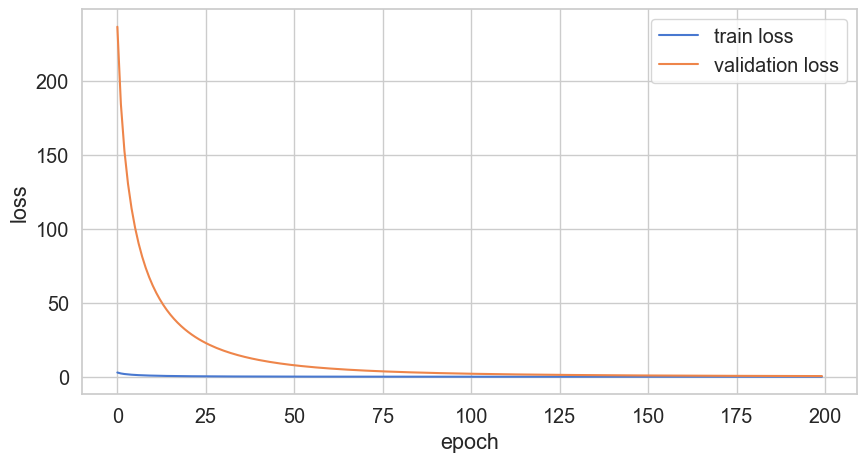

In [28]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
plt.figure(figsize=(10,5));
plt.plot(recommender.train_loss,label='train loss');
plt.plot(recommender.val_loss,label='validation loss');
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [29]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [30]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [31]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,7,Marilyn Manson,0.196486
1,475,Eminem,0.052734
2,614,Pearl Jam,0.043204
3,978,Disturbed,0.042016
4,1104,Rammstein,0.029742
5,1118,A Perfect Circle,0.029031
6,1131,Tool,0.025657
7,2172,Gojira,0.021690
8,2479,Twiztid,0.021562
9,6257,Rob Zombie,0.020879


In [32]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

ValueError: All arrays must be of the same length

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**